In [1]:
import numpy as np

import torch

from bayes_opt import BayesianOptimization

import pacmap

from ppo import gauss_clusters

from utils import draw_z, normalise

import matplotlib.pyplot as plt

import time

import os

import warnings

# direct pacmap

In [41]:
def pacmap_bayesian(n_neighbors, MN_ratio, FP_ratio):

    data, labels = gauss_clusters(
        n_clusters=20,
        dim=50,
        pts_cluster=250,
        stepsize=6,
        random_state=None,
    )

    pcm = pacmap.PaCMAP(n_components=2, n_neighbors=int(n_neighbors), MN_ratio=MN_ratio, FP_ratio=FP_ratio)

    z = pcm.fit_transform(data)

    t = time.strftime('%m%d%H%M%S', time.localtime())
    plt.cla()
    draw_z(
        z=normalise(z), 
        cls=labels, #np.ones((z.shape[0], 1)), 
        s=1, 
        save_path=os.path.join("./runs/BO/entire/{}.png".format(t)), 
        display=False, 
        title=t, 
        palette='Spectral' # None
    )

    score = float(input('please rate this visualization in [0,1]'))

    return score

In [42]:
bounds_pacmap = {
    'n_neighbors': (5, 100), 
    'MN_ratio': (0.2, 10.0),
    'FP_ratio': (0.2, 10.0)
}

run_BO = BayesianOptimization(pacmap_bayesian, bounds_pacmap)

In [43]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# 17m 37s -- 32 steps

|   iter    |  target   | FP_ratio  | MN_ratio  | n_neig... |
-------------------------------------------------------------
| 1         | 0.0       | 6.565     | 8.362     | 44.48     |
| 2         | 0.8       | 4.445     | 7.221     | 86.8      |
| 3         | 0.0       | 8.276     | 0.2248    | 27.85     |
| 4         | 0.0       | 4.884     | 3.298     | 29.39     |
| 5         | 0.1       | 5.707     | 4.064     | 82.74     |
| 6         | 0.0       | 6.736     | 4.865     | 64.02     |
| 7         | 0.8       | 1.523     | 2.451     | 70.03     |
| 8         | 0.1       | 5.141     | 8.339     | 47.41     |
| 9         | 0.0       | 6.168     | 5.416     | 30.25     |
| 10        | 0.0       | 8.076     | 6.073     | 39.69     |
| 11        | 0.8       | 3.621     | 9.226     | 89.33     |
| 12        | 1.0       | 0.2       | 5.476     | 89.44     |
| 13        | 0.9       | 3.537     | 3.013     | 93.45     |
| 14        | 1.0       | 0.2       | 6.676     | 98.56     |
| 15    

: 

# partition

In [3]:
from myPaCMAP import myPaCMAP, generate_pair
from ppo import get_partition

def pacmap_bayesian_partition(
    n_neighbors1, 
    n_neighbors2, 
    n_neighbors3, 
    n_neighbors4, 
    n_neighbors5, 
    n_neighbors6, 
    n_neighbors7, 
    n_neighbors8, 
    n_neighbors9, 
    n_neighbors10, 
    n_neighbors11, 
    n_neighbors12, 
    n_neighbors13, 
    n_neighbors14, 
    n_neighbors15, 
    n_neighbors16, 
    n_neighbors17, 
    n_neighbors18, 
    n_neighbors19, 
    n_neighbors20, 
    MN_ratio1, 
    MN_ratio2, 
    MN_ratio3, 
    MN_ratio4, 
    MN_ratio5, 
    MN_ratio6, 
    MN_ratio7, 
    MN_ratio8, 
    MN_ratio9, 
    MN_ratio10, 
    MN_ratio11, 
    MN_ratio12, 
    MN_ratio13, 
    MN_ratio14, 
    MN_ratio15, 
    MN_ratio16, 
    MN_ratio17, 
    MN_ratio18, 
    MN_ratio19, 
    MN_ratio20, 
    FP_ratio1, 
    FP_ratio2, 
    FP_ratio3, 
    FP_ratio4, 
    FP_ratio5, 
    FP_ratio6, 
    FP_ratio7, 
    FP_ratio8, 
    FP_ratio9, 
    FP_ratio10, 
    FP_ratio11, 
    FP_ratio12, 
    FP_ratio13, 
    FP_ratio14, 
    FP_ratio15, 
    FP_ratio16, 
    FP_ratio17, 
    FP_ratio18, 
    FP_ratio19, 
    FP_ratio20
):

    data, labels = gauss_clusters(
        n_clusters=20,
        dim=50,
        pts_cluster=250,
        stepsize=6,
        random_state=None,
    )

    data = data.astype(np.float32)
    labels = labels.astype(np.float32)

    idx = np.random.choice(data.shape[0], 5000, replace=False)
    data, labels = data[idx], labels[idx]

    partition = get_partition(data, k=20)

    n_neighbors = np.array([
        n_neighbors1,
        n_neighbors2,
        n_neighbors3,
        n_neighbors4,
        n_neighbors5,
        n_neighbors6,
        n_neighbors7,
        n_neighbors8,
        n_neighbors9,
        n_neighbors10,
        n_neighbors11,
        n_neighbors12,
        n_neighbors13,
        n_neighbors14,
        n_neighbors15,
        n_neighbors16,
        n_neighbors17,
        n_neighbors18,
        n_neighbors19,
        n_neighbors20
    ])

    MN_ratio = np.array([
        MN_ratio1,
        MN_ratio2,
        MN_ratio3,
        MN_ratio4,
        MN_ratio5,
        MN_ratio6,
        MN_ratio7,
        MN_ratio8,
        MN_ratio9,
        MN_ratio10,
        MN_ratio11,
        MN_ratio12,
        MN_ratio13,
        MN_ratio14,
        MN_ratio15,
        MN_ratio16,
        MN_ratio17,
        MN_ratio18,
        MN_ratio19,
        MN_ratio20
    ])

    FP_ratio = np.array([
        FP_ratio1,
        FP_ratio2,
        FP_ratio3,
        FP_ratio4,
        FP_ratio5,
        FP_ratio6,
        FP_ratio7,
        FP_ratio8,
        FP_ratio9,
        FP_ratio10,
        FP_ratio11,
        FP_ratio12,
        FP_ratio13,
        FP_ratio14,
        FP_ratio15,
        FP_ratio16,
        FP_ratio17,
        FP_ratio18,
        FP_ratio19,
        FP_ratio20
    ])

    n_neighbors = {k:n_neighbors[k] for k in range(len(n_neighbors))}
    n_neighbors = np.array([n_neighbors[i.item()] for i in partition]).astype(np.int32)

    # print(len(n_neighbors))
    # print(n_neighbors[0])

    MN_ratio = {k:MN_ratio[k] for k in range(len(MN_ratio))}
    MN_ratio = np.array([MN_ratio[i.item()] for i in partition])

    # print(len(MN_ratio))
    # print(MN_ratio[0])

    FP_ratio = {k:FP_ratio[k] for k in range(len(FP_ratio))}
    FP_ratio = np.array([FP_ratio[i.item()] for i in partition])

    # print(len(FP_ratio))
    # print(FP_ratio[0])

    n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
    n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

    # print(n_neighbors, n_MN, n_FP)

    # generate kNN neighbors, mid-pairs, negatives
    pair_neighbors, pair_MN, pair_FP, tree = generate_pair(
        data, n_neighbors, n_MN, n_FP, distance='euclidean', verbose=False
    )

    pcm = myPaCMAP(
        n_components=2, 
        n_neighbors=n_neighbors, 
        MN_ratio=MN_ratio, 
        FP_ratio=FP_ratio, 
        pair_neighbors=pair_neighbors, 
        pair_MN=pair_MN, 
        pair_FP=pair_FP
    )

    z = pcm.fit_transform(data, n_neighbors=n_neighbors, n_MN=n_MN, n_FP=n_FP)

    t = time.strftime('%m%d%H%M%S', time.localtime())
    plt.cla()
    draw_z(
        z=normalise(z), 
        cls=labels, #np.ones((z.shape[0], 1)), 
        s=1, 
        save_path=os.path.join("./runs/BO/partition/{}.png".format(t)), 
        display=False, 
        title=t, 
        palette='Spectral' # None
    )

    score = float(input('please rate this visualization in [0,1]'))

    return score

In [7]:
# bounds_pacmap = {
#     'n_neighbors1': (5, 200), 
#     'n_neighbors2': (5, 200), 
#     'n_neighbors3': (5, 200), 
#     'n_neighbors4': (5, 200), 
#     'n_neighbors5': (5, 200), 
#     'n_neighbors6': (5, 200), 
#     'n_neighbors7': (5, 200), 
#     'n_neighbors8': (5, 200), 
#     'n_neighbors9': (5, 200), 
#     'n_neighbors10': (5, 200), 
#     'n_neighbors11': (5, 200), 
#     'n_neighbors12': (5, 200), 
#     'n_neighbors13': (5, 200), 
#     'n_neighbors14': (5, 200), 
#     'n_neighbors15': (5, 200), 
#     'n_neighbors16': (5, 200), 
#     'n_neighbors17': (5, 200), 
#     'n_neighbors18': (5, 200), 
#     'n_neighbors19': (5, 200), 
#     'n_neighbors20': (5, 200), 
#     'MN_ratio1': (0.2, 50.0),
#     'MN_ratio2': (0.2, 50.0),
#     'MN_ratio3': (0.2, 50.0),
#     'MN_ratio4': (0.2, 50.0),
#     'MN_ratio5': (0.2, 50.0),
#     'MN_ratio6': (0.2, 50.0),
#     'MN_ratio7': (0.2, 50.0),
#     'MN_ratio8': (0.2, 50.0),
#     'MN_ratio9': (0.2, 50.0),
#     'MN_ratio10': (0.2, 50.0),
#     'MN_ratio11': (0.2, 50.0),
#     'MN_ratio12': (0.2, 50.0),
#     'MN_ratio13': (0.2, 50.0),
#     'MN_ratio14': (0.2, 50.0),
#     'MN_ratio15': (0.2, 50.0),
#     'MN_ratio16': (0.2, 50.0),
#     'MN_ratio17': (0.2, 50.0),
#     'MN_ratio18': (0.2, 50.0),
#     'MN_ratio19': (0.2, 50.0),
#     'MN_ratio20': (0.2, 50.0),
#     'FP_ratio1': (0.2, 50.0),
#     'FP_ratio2': (0.2, 50.0),
#     'FP_ratio3': (0.2, 50.0),
#     'FP_ratio4': (0.2, 50.0),
#     'FP_ratio5': (0.2, 50.0),
#     'FP_ratio6': (0.2, 50.0),
#     'FP_ratio7': (0.2, 50.0),
#     'FP_ratio8': (0.2, 50.0),
#     'FP_ratio9': (0.2, 50.0),
#     'FP_ratio10': (0.2, 50.0),
#     'FP_ratio11': (0.2, 50.0),
#     'FP_ratio12': (0.2, 50.0),
#     'FP_ratio13': (0.2, 50.0),
#     'FP_ratio14': (0.2, 50.0),
#     'FP_ratio15': (0.2, 50.0),
#     'FP_ratio16': (0.2, 50.0),
#     'FP_ratio17': (0.2, 50.0),
#     'FP_ratio18': (0.2, 50.0),
#     'FP_ratio19': (0.2, 50.0),
#     'FP_ratio20': (0.2, 50.0)
# }

# bounds_pacmap = {
#     'n_neighbors1': (5, 100), 
#     'n_neighbors2': (5, 100), 
#     'n_neighbors3': (5, 100), 
#     'n_neighbors4': (5, 100), 
#     'n_neighbors5': (5, 100), 
#     'n_neighbors6': (5, 100), 
#     'n_neighbors7': (5, 100), 
#     'n_neighbors8': (5, 100), 
#     'n_neighbors9': (5, 100), 
#     'n_neighbors10': (5, 100), 
#     'n_neighbors11': (5, 100), 
#     'n_neighbors12': (5, 100), 
#     'n_neighbors13': (5, 100), 
#     'n_neighbors14': (5, 100), 
#     'n_neighbors15': (5, 100), 
#     'n_neighbors16': (5, 100), 
#     'n_neighbors17': (5, 100), 
#     'n_neighbors18': (5, 100), 
#     'n_neighbors19': (5, 100), 
#     'n_neighbors20': (5, 100), 
#     'MN_ratio1': (0.2, 20.0),
#     'MN_ratio2': (0.2, 20.0),
#     'MN_ratio3': (0.2, 20.0),
#     'MN_ratio4': (0.2, 20.0),
#     'MN_ratio5': (0.2, 20.0),
#     'MN_ratio6': (0.2, 20.0),
#     'MN_ratio7': (0.2, 20.0),
#     'MN_ratio8': (0.2, 20.0),
#     'MN_ratio9': (0.2, 20.0),
#     'MN_ratio10': (0.2, 20.0),
#     'MN_ratio11': (0.2, 20.0),
#     'MN_ratio12': (0.2, 20.0),
#     'MN_ratio13': (0.2, 20.0),
#     'MN_ratio14': (0.2, 20.0),
#     'MN_ratio15': (0.2, 20.0),
#     'MN_ratio16': (0.2, 20.0),
#     'MN_ratio17': (0.2, 20.0),
#     'MN_ratio18': (0.2, 20.0),
#     'MN_ratio19': (0.2, 20.0),
#     'MN_ratio20': (0.2, 20.0),
#     'FP_ratio1': (0.2, 20.0),
#     'FP_ratio2': (0.2, 20.0),
#     'FP_ratio3': (0.2, 20.0),
#     'FP_ratio4': (0.2, 20.0),
#     'FP_ratio5': (0.2, 20.0),
#     'FP_ratio6': (0.2, 20.0),
#     'FP_ratio7': (0.2, 20.0),
#     'FP_ratio8': (0.2, 20.0),
#     'FP_ratio9': (0.2, 20.0),
#     'FP_ratio10': (0.2, 20.0),
#     'FP_ratio11': (0.2, 20.0),
#     'FP_ratio12': (0.2, 20.0),
#     'FP_ratio13': (0.2, 20.0),
#     'FP_ratio14': (0.2, 20.0),
#     'FP_ratio15': (0.2, 20.0),
#     'FP_ratio16': (0.2, 20.0),
#     'FP_ratio17': (0.2, 20.0),
#     'FP_ratio18': (0.2, 20.0),
#     'FP_ratio19': (0.2, 20.0),
#     'FP_ratio20': (0.2, 20.0)
# }

bounds_pacmap = {
    'n_neighbors1': (5, 100), 
    'n_neighbors2': (5, 100), 
    'n_neighbors3': (5, 100), 
    'n_neighbors4': (5, 100), 
    'n_neighbors5': (5, 100), 
    'n_neighbors6': (5, 100), 
    'n_neighbors7': (5, 100), 
    'n_neighbors8': (5, 100), 
    'n_neighbors9': (5, 100), 
    'n_neighbors10': (5, 100), 
    'n_neighbors11': (5, 100), 
    'n_neighbors12': (5, 100), 
    'n_neighbors13': (5, 100), 
    'n_neighbors14': (5, 100), 
    'n_neighbors15': (5, 100), 
    'n_neighbors16': (5, 100), 
    'n_neighbors17': (5, 100), 
    'n_neighbors18': (5, 100), 
    'n_neighbors19': (5, 100), 
    'n_neighbors20': (5, 100), 
    'MN_ratio1': (0.2, 10.0),
    'MN_ratio2': (0.2, 10.0),
    'MN_ratio3': (0.2, 10.0),
    'MN_ratio4': (0.2, 10.0),
    'MN_ratio5': (0.2, 10.0),
    'MN_ratio6': (0.2, 10.0),
    'MN_ratio7': (0.2, 10.0),
    'MN_ratio8': (0.2, 10.0),
    'MN_ratio9': (0.2, 10.0),
    'MN_ratio10': (0.2, 10.0),
    'MN_ratio11': (0.2, 10.0),
    'MN_ratio12': (0.2, 10.0),
    'MN_ratio13': (0.2, 10.0),
    'MN_ratio14': (0.2, 10.0),
    'MN_ratio15': (0.2, 10.0),
    'MN_ratio16': (0.2, 10.0),
    'MN_ratio17': (0.2, 10.0),
    'MN_ratio18': (0.2, 10.0),
    'MN_ratio19': (0.2, 10.0),
    'MN_ratio20': (0.2, 10.0),
    'FP_ratio1': (0.2, 10.0),
    'FP_ratio2': (0.2, 10.0),
    'FP_ratio3': (0.2, 10.0),
    'FP_ratio4': (0.2, 10.0),
    'FP_ratio5': (0.2, 10.0),
    'FP_ratio6': (0.2, 10.0),
    'FP_ratio7': (0.2, 10.0),
    'FP_ratio8': (0.2, 10.0),
    'FP_ratio9': (0.2, 10.0),
    'FP_ratio10': (0.2, 10.0),
    'FP_ratio11': (0.2, 10.0),
    'FP_ratio12': (0.2, 10.0),
    'FP_ratio13': (0.2, 10.0),
    'FP_ratio14': (0.2, 10.0),
    'FP_ratio15': (0.2, 10.0),
    'FP_ratio16': (0.2, 10.0),
    'FP_ratio17': (0.2, 10.0),
    'FP_ratio18': (0.2, 10.0),
    'FP_ratio19': (0.2, 10.0),
    'FP_ratio20': (0.2, 10.0)
}

run_BO = BayesianOptimization(pacmap_bayesian_partition, bounds_pacmap)

### BO3

In [65]:
# first time

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# 27m 41s -- 32 steps

|   iter    |  target   | FP_ratio1 | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_ratio2 | FP_rat... | FP_ratio3 | FP_ratio4 | FP_ratio5 | FP_ratio6 | FP_ratio7 | FP_ratio8 | FP_ratio9 | MN_ratio1 | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_ratio2 | MN_rat... | MN_ratio3 | MN_ratio4 | MN_ratio5 | MN_ratio6 | MN_ratio7 | MN_ratio8 | MN_ratio9 | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

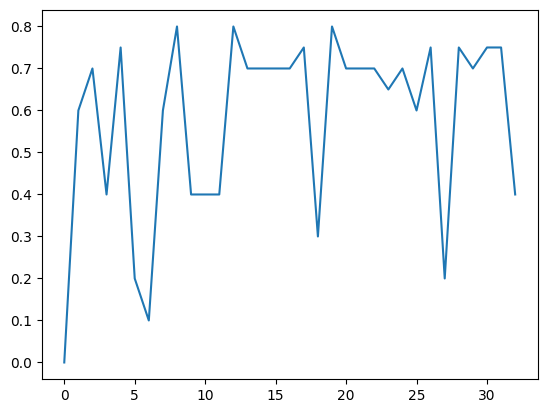

In [7]:
targets = [0., 0.6, 0.7, 0.4, 0.75, 0.2, 0.1, 0.6, 0.8, 0.4, 0.4, 0.4, 0.8, 0.7, 0.7, 0.7, 0.7, 0.75, 0.3, 0.8, 0.7, 0.7, 0.7, 0.65, 0.7, 0.6, 0.75, 0.2, 0.75, 0.7, 0.75, 0.75, 0.4]

%matplotlib inline
plt.plot(targets)
# plt.xticks(np.arange(1,33))
plt.show()

In [8]:
# second time

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# 26m 47.6s -- 32 steps
# BO3

|   iter    |  target   | FP_ratio1 | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_ratio2 | FP_rat... | FP_ratio3 | FP_ratio4 | FP_ratio5 | FP_ratio6 | FP_ratio7 | FP_ratio8 | FP_ratio9 | MN_ratio1 | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_ratio2 | MN_rat... | MN_ratio3 | MN_ratio4 | MN_ratio5 | MN_ratio6 | MN_ratio7 | MN_ratio8 | MN_ratio9 | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# third time

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# m s -- 32 steps
# BO1

### BO2

In [6]:
# BO2

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# 48m 57.7s -- 32 steps

|   iter    |  target   | FP_ratio1 | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_ratio2 | FP_rat... | FP_ratio3 | FP_ratio4 | FP_ratio5 | FP_ratio6 | FP_ratio7 | FP_ratio8 | FP_ratio9 | MN_ratio1 | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_ratio2 | MN_rat... | MN_ratio3 | MN_ratio4 | MN_ratio5 | MN_ratio6 | MN_ratio7 | MN_ratio8 | MN_ratio9 | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KeyboardInterrupt: 

In [ ]:
# targets = [0., 0.6, 0.7, 0.4, 0.75, 0.2, 0.1, 0.6, 0.8, 0.4, 0.4, 0.4, 0.8, 0.7, 0.7, 0.7, 0.7, 0.75, 0.3, 0.8, 0.7, 0.7, 0.7, 0.65, 0.7, 0.6, 0.75, 0.2, 0.75, 0.7, 0.75, 0.75, 0.4]

%matplotlib inline
plt.plot(targets)
# plt.xticks(np.arange(1,33))
plt.show()

### BO1

In [6]:
# second time

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    run_BO.maximize(init_points=10, n_iter=32-10)

# m s -- 32 steps
# BO1

|   iter    |  target   | FP_ratio1 | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_rat... | FP_ratio2 | FP_rat... | FP_ratio3 | FP_ratio4 | FP_ratio5 | FP_ratio6 | FP_ratio7 | FP_ratio8 | FP_ratio9 | MN_ratio1 | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_rat... | MN_ratio2 | MN_rat... | MN_ratio3 | MN_ratio4 | MN_ratio5 | MN_ratio6 | MN_ratio7 | MN_ratio8 | MN_ratio9 | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... | n_neig... |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# targets = [0., 0.6, 0.7, 0.4, 0.75, 0.2, 0.1, 0.6, 0.8, 0.4, 0.4, 0.4, 0.8, 0.7, 0.7, 0.7, 0.7, 0.75, 0.3, 0.8, 0.7, 0.7, 0.7, 0.65, 0.7, 0.6, 0.75, 0.2, 0.75, 0.7, 0.75, 0.75, 0.4]

%matplotlib inline
plt.plot(targets)
# plt.xticks(np.arange(1,33))
plt.show()